In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as mtick
import statistics

In [4]:
df = pd.read_csv('mental_health_dataset.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   User_ID                  10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Occupation               10000 non-null  object 
 4   Country                  10000 non-null  object 
 5   Mental_Health_Condition  10000 non-null  object 
 6   Severity                 4995 non-null   object 
 7   Consultation_History     10000 non-null  object 
 8   Stress_Level             10000 non-null  object 
 9   Sleep_Hours              10000 non-null  float64
 10  Work_Hours               10000 non-null  float64
 11  Physical_Activity_Hours  10000 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 937.6+ KB


In [7]:
print(df.duplicated('User_ID'))

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool


In [5]:
df.head(30)
# severity high without mental health condition...must be referring to stress levels
# variance in respondents - dataset is large enough to ignore these errors and include this data?
# how was sleep hours and work hours recorded and calculated (why are they floats?)
# maybe taken as average of some other data
# is this data trustworthy? how did they get exactly 10000 entries?

,User_ID,Age,Gender,Occupation,Country,Mental_Health_Condition,Severity,Consultation_History,Stress_Level,Sleep_Hours,Work_Hours,Physical_Activity_Hours
0,1,59,Female,Education,USA,No,None,No,Low,5.232384,45.603788,2
1,2,52,Male,Engineering,India,No,Low,No,Medium,5.659933,60.139037,1
2,3,20,Female,Engineering,Canada,No,High,Yes,Medium,7.729085,51.882993,0
3,4,54,Female,Engineering,Other,No,None,Yes,Medium,6.259258,68.017362,8
4,5,38,Female,Other,Canada,No,Low,No,Medium,8.944890,64.701298,4
5,6,64,Male,Education,Germany,No,None,Yes,Medium,7.005910,33.080235,6
6,7,27,Prefer not to say,Education,Canada,No,Low,Yes,Low,6.981471,45.940912,0
7,8,31,Prefer not to say,Education,UK,No,None,No,Low,6.722942,47.324530,4
8,9,62,Female,IT,Germany,No,None,No,Low,5.847117,61.985827,1
9,10,50,Female,Engineering,India,No,None,No,Medium,5.764622,68.194845,2


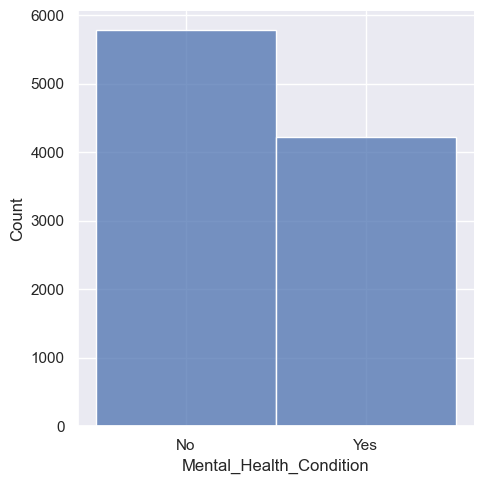

In [91]:
a= sns.displot(df, x='Mental_Health_Condition')

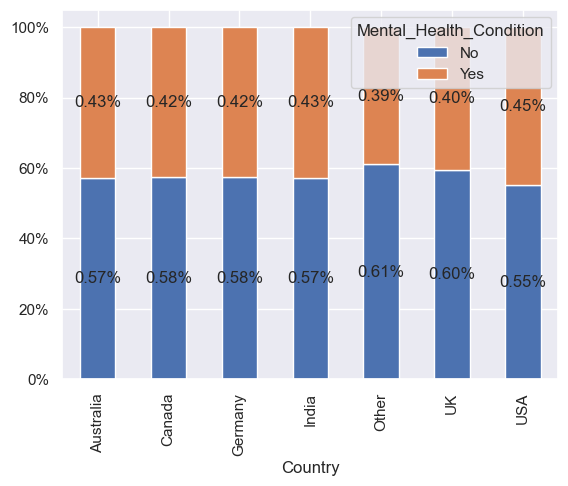

In [343]:
ax1 = pd.crosstab(df['Country'], df['Mental_Health_Condition'], normalize='index').plot.bar(stacked=True)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1))
for c in ax1.containers:
    ax1.bar_label(c, fmt='%.2f%%', label_type='center')


[Text(0, 0, '58%'), Text(0, 0, '42%')]

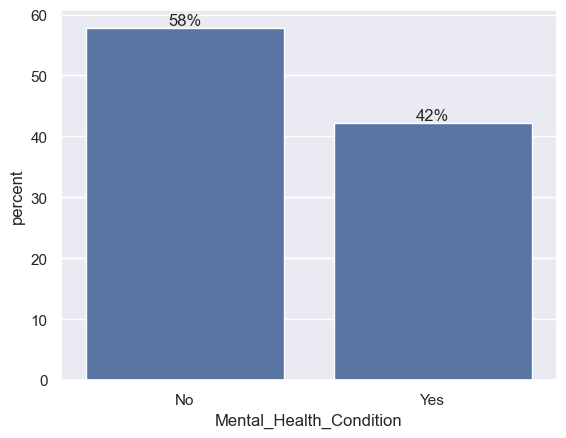

In [240]:
# in percentages what percent of the population has mental health condition vs doesnt
ax=sns.countplot(data=df, x='Mental_Health_Condition', stat='percent')
ax.bar_label(ax.containers[0], fmt='%.0f%%', label_type='edge')


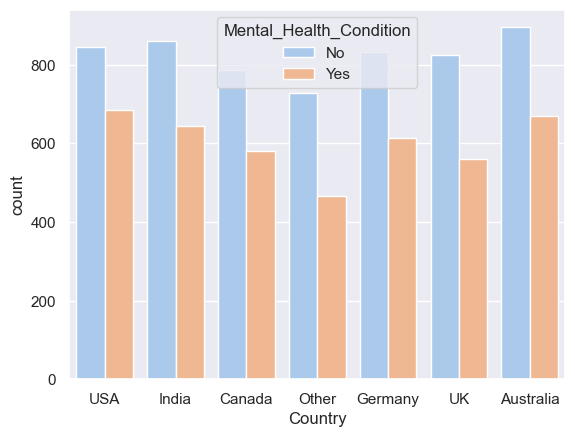

In [340]:
ax2 = sns.countplot(df, hue='Mental_Health_Condition', x='Country', stat='count', palette='pastel')

<Axes: xlabel='Sleep_Hours'>

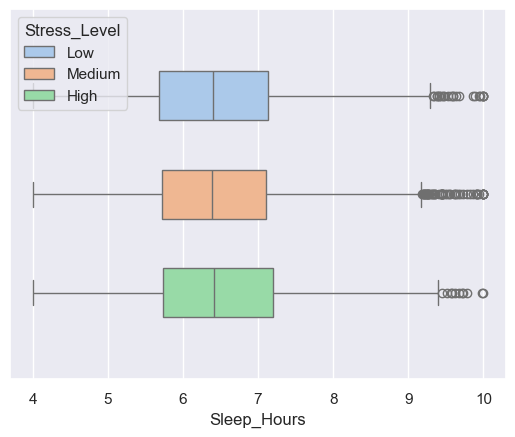

In [402]:
# greater sleep hours result in higher stress levels? investigate this further with statistics
sns.boxplot(df, hue='Stress_Level', x='Sleep_Hours', gap=0.5, palette='pastel')

In [410]:
df[['Stress_Level','Sleep_Hours']].groupby('Stress_Level').mean()
# less sleep means less stress? check for outliers

,Sleep_Hours
Stress_Level,
High,6.493227
Low,6.451949
Medium,6.450596


In [411]:
df[['Stress_Level','Sleep_Hours']].groupby('Stress_Level').describe()

Sleep_Hours                                               \
                   count      mean       std  min       25%       50%   
Stress_Level                                                            
High              2050.0  6.493227  1.066760  4.0  5.732584  6.409856   
Low               2901.0  6.451949  1.071366  4.0  5.688063  6.394746   
Medium            5049.0  6.450596  1.051198  4.0  5.724987  6.384704   

                              
                   75%   max  
Stress_Level                  
High          7.202318  10.0  
Low           7.133320  10.0  
Medium        7.108739  10.0

In [ ]:
# null hypothesis = mean of sleep hours no difference between high and low stress levels
# alternative hypothesis = significant difference between two means of high and low
